In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# pd.set_option('display.height', 500)
# pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_columns',100)
# pd.set_option('display.width', 1000)



In [3]:
#reading data

df_crime= pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/RPD__Part_I_Crime_2011_to_Present.csv") #Reading the dataset in a dataframe using Pandas

#reading data
print("==================================================================")
feature_set = pd.read_csv("/Users/pallavi/Downloads/CleanCrime.csv") #Reading the dataset in a dataframe using Pandas
#Here df is the dataframeset
print(feature_set.info())

#To see the info of the data frame 
print("==================================================================")
df_Personnel= pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/RPD_Police_Personnel.csv") #Reading the dataset in a dataframe using Pandas
print(df_Personnel.info())
print("==================================================================")
df_Shooting_Victims=pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/Rochester_Shooting_Victims.csv")
print(df_Shooting_Victims.info())
print("==================================================================")
df_homicides=pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/RochesterNY_Homicides.csv")
print(df_homicides.info())
print("==================================================================")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78416 entries, 0 to 78415
Data columns (total 48 columns):
X                                     77960 non-null float64
Y                                     77960 non-null float64
OBJECTID                              78416 non-null int64
Geocode_Address                       77960 non-null object
Geocode_Street                        78416 non-null object
OccurredFrom_Date_Year                78416 non-null int64
OccurredFrom_Date_Month               78416 non-null int64
OccurredFrom_Time                     78416 non-null int64
Shift                                 78416 non-null object
CleanedTime1                          78416 non-null object
Date                                  78416 non-null object
OccurredFrom_Timestamp                78416 non-null object
OccurredThrough_Date_Year             78416 non-null int64
OccurredThrough_Date_Month            78416 non-null int64
OccurredThrough_Time                  78416 non-null in

In [5]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
count=0;
for index, row in feature_set.iterrows():
    if (pd.isnull(row['Geocode_Address'] )):
         location = geolocator.geocode(row['Geocode_Street'])
         if location is not None:
             latitude = location.latitude
             longitude= location.longitude
             feature_set.set_value(index,'X',latitude)
             feature_set.set_value(index,'Y',longitude)
             feature_set.set_value(index,'Geocode_Address',location)
             print('Street',row['Geocode_Street'])

/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


Street 222 ARBORWOOD LA  
Street 275 COMMERCE DR  
Street 1 BAUSCH & LOMB PL  
Street 1 BAUSCH & LOMB PL  
Street 1 BAUSCH & LOMB PL  
Street 70 G RAMONA PARK
Street 1290 A EMERSON ST
Street 708 B JOSEPH AVE
Street 0 UNKNOWN  
Street 2121 WHITNEY RD E  
Street 157 DAFFODIL TRAIL  
Street 120 A STENSON ST
Street 77 REAR PRIMROSE ST
Street 14 REAR WOODFORD ST
Street 44 B MANOR PKWY
Street 535 WINTON N ROAD
Street 140 C GREEN KNOLLS DR
Street 142 NORTON VILLAGE LA  
Street 905 C SOUTH AVE
Street 56 D DODGE ST
Street 56 D DODGE ST
Street 49 B BENNINGTON DR
Street 49 B BENNINGTON DR
Street 95 G MARIETTA ST
Street 46 B DODGE ST
Street 84 C DODGE ST
Street 480 WINTON N ROAD
Street 87 VAN ANDEN ST  
Street 98 B GREEN KNOLLS DR
Street 17 A MANOR PKWY
Street 42 D MANOR PKWY
Street 147 B ACKERMAN ST
Street 1 JAMES ST  
Street 58 C MANOR PKWY
Street 76 A DODGE ST
Street 23 A ALEXANDER ST
Street 31 B PLOVER ST
Street 755 WINTON N ROAD
Street 44 B WELD ST
Street 525 N WINTON ROAD
Street 663 WINTON N

In [5]:
# feature_set=feature_set.dropna(how='all',axis=0)

print(pd.isna(feature_set['X']))
display(feature_set)

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
78386    False
78387    False
78388    False
78389    False
78390    False
78391    False
78392    False
78393    False
78394    False
78395    False
78396    False
78397    False
78398    False
78399    False
78400    False
78401    False
78402    False
78403    False
78404    False
78405    False
78406    False
78407    False
78408    False
78409    False
78410    False
78411    False
78412    False
78413    False
78414    False
78415    False
Name: X, Length: 78416, dtype: bool


,X,Y,OBJECTID,Geocode_Address,Geocode_Street,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,Shift,CleanedTime1,...,Statute_Text,Statute_Description,Statute_CrimeCategory,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Beat,Geo_Section,Geo_Section_Num
0,NaN,NaN,1,NaN,* Address Not Specified *,2018,2,800,MorningShift,8:00:00 AM,...,Larceny,Grand Larceny 4th: Firearms/Rifles/Shotguns ...,6,Completed,* No Weapon Specified *,All Other Larcenies,Unknown,NaN,NaN,NaN
1,NaN,NaN,2,NaN,* Address Not Specified *,2018,2,1200,AfternoonShift,12:00:00 PM,...,Larceny,Grand Larceny 3rd: Property Value Exceeds $300...,6,Completed,* No Weapon Specified *,All Other Larcenies,Other Commercial Service Location,NaN,NaN,NaN
2,NaN,NaN,3,NaN,* Address Not Specified *,2018,2,1500,AfternoonShift,3:00:00 PM,...,Larceny,Grand Larceny 3rd ...,6,Completed,* No Weapon Specified *,All Other Larcenies,Other Commercial Service Location,NaN,NaN,NaN
3,NaN,NaN,4,NaN,* Address Not Specified *,2018,2,941,MorningShift,9:41:00 AM,...,Aggravated Assault,Assault 2nd: Intent To Cause Physical Injury w...,4,Completed,Knife/Cutting Instrument,* No Larceny Type Specified *,Parking Lot,NaN,NaN,NaN
4,NaN,NaN,5,NaN,* Address Not Specified *,2018,1,1200,AfternoonShift,12:00:00 PM,...,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,All Other Larcenies,Financial Institution,NaN,NaN,NaN
5,NaN,NaN,6,NaN,* Address Not Specified *,2018,1,1200,AfternoonShift,12:00:00 PM,...,Larceny,Grand Larceny 4th: Value Property Greater Than...,6,Completed,* No Weapon Specified *,Motor Vehicle Theft,Street,NaN,NaN,NaN
6,NaN,NaN,7,NaN,* Address Not Specified *,2017,6,1200,AfternoonShift,12:00:00 PM,...,Larceny,Grand Larceny 4th: Firearms/Rifles/Shotguns ...,6,Completed,* No Weapon Specified *,All Other Larcenies,Parking Lot,NaN,NaN,NaN
7,NaN,NaN,8,NaN,* Address Not Specified *,2014,6,30,MorningShift,12:30:00 AM,...,Burglary,Burglary 3rd: Illegal Entry with Intent to Com...,5,Completed,* No Weapon Specified *,* No Larceny Type Specified *,Garage/Shed,NaN,NaN,NaN
8,NaN,NaN,9,NaN,* Address Not Specified *,2017,12,100,MorningShift,1:00:00 AM,...,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,Theft from Motor Vehicle,Other Outside Location,NaN,NaN,NaN
9,NaN,NaN,10,NaN,* Address Not Specified *,2017,12,120,MorningShift,1:20:00 AM,...,Motor Vehicle Theft,Grand Larceny 4th: Motor Vehicle Value Exceeds...,7,Completed,* No Weapon Specified *,Motor Vehicle Theft,Parking Lot,NaN,NaN,NaN


In [6]:
print("Check the missing values after replaceing the longitude and latitude: ")
pd.isnull(feature_set).sum()



Check the missing values after replaceing the longitude and latitude: 


X                                     152
Y                                     152
OBJECTID                                0
Geocode_Address                       152
Geocode_Street                          0
OccurredFrom_Date_Year                  0
OccurredFrom_Date_Month                 0
OccurredFrom_Time                       0
Shift                                   0
CleanedTime1                            0
Date                                    0
OccurredFrom_Timestamp                  0
OccurredThrough_Date_Year               0
OccurredThrough_Date_Month              0
OccurredThrough_Time                    0
Shift.1                                 0
CleanedTime2                            0
Duration of Crime                       0
OccurredThrough_Timestamp               0
Week_Name                               0
Reported_Date_Year                      0
Reported_Date_Month                     0
Reported_Time                           0
ReportedTime                      

In [7]:
feature_set_cleaned=feature_set.dropna(axis=0)

In [8]:
print("Check the missing values after replaceing the longitude and latitude: ")
pd.isnull(feature_set_cleaned).sum()

Check the missing values after replaceing the longitude and latitude: 


X                                     0
Y                                     0
OBJECTID                              0
Geocode_Address                       0
Geocode_Street                        0
OccurredFrom_Date_Year                0
OccurredFrom_Date_Month               0
OccurredFrom_Time                     0
Shift                                 0
CleanedTime1                          0
Date                                  0
OccurredFrom_Timestamp                0
OccurredThrough_Date_Year             0
OccurredThrough_Date_Month            0
OccurredThrough_Time                  0
Shift.1                               0
CleanedTime2                          0
Duration of Crime                     0
OccurredThrough_Timestamp             0
Week_Name                             0
Reported_Date_Year                    0
Reported_Date_Month                   0
Reported_Time                         0
ReportedTime                          0
Reported_Timestamp                    0


In [9]:
print(display(feature_set_cleaned))

,X,Y,OBJECTID,Geocode_Address,Geocode_Street,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,Shift,CleanedTime1,...,Statute_Text,Statute_Description,Statute_CrimeCategory,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Beat,Geo_Section,Geo_Section_Num
13,-77.641021,43.145561,14,"153 Wellington Ave, Rochester, NY, 14611",153 WELLINGTON AVE,2016,4,1000,MorningShift,10:00:00 AM,...,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,All Other Larcenies,Single Family Home,223.0,Genesee,3.0
14,-77.644837,43.166885,15,"103 Warner St, Rochester, NY, 14606",103 WARNER ST,2016,4,1817,NightShift,6:17:00 PM,...,Robbery,Robbery 3rd ...,3,Completed,Not Reported,* No Larceny Type Specified *,Yard,261.0,Lake,1.0
15,-77.628075,43.138832,16,"57 Nellis Park, Rochester, NY, 14608",57 NELLIS PARK,2016,6,900,MorningShift,9:00:00 AM,...,Burglary,Burglary 2nd: Illegal Entry: Dwelling ...,5,Completed,* No Weapon Specified *,* No Larceny Type Specified *,Single Family Home,253.0,Genesee,3.0
16,-77.629077,43.137793,17,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,2017,6,1630,NightShift,4:30:00 PM,...,Aggravated Assault,Menacing 2nd: Weapon ...,4,Completed,Firearm,* No Larceny Type Specified *,Street,253.0,Genesee,3.0
17,-77.629077,43.137793,18,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,2016,7,2300,NightShift,11:00:00 PM,...,Robbery,Robbery 2nd: Aided By Another ...,3,Completed,Not Reported,* No Larceny Type Specified *,Street,253.0,Genesee,3.0
18,-77.629077,43.137793,19,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,2011,6,621,MorningShift,6:21:00 AM,...,Robbery,Robbery 1st: Displays What Appears To Be a Fir...,3,Completed,"Revolver, Derringer, or Single-shot Pistol",All Other Larcenies,Street,253.0,Genesee,3.0
19,-77.629077,43.137793,20,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,2013,4,2147,NightShift,9:47:00 PM,...,Robbery,Robbery 2nd: Displays What Appears To Be a Fir...,3,Completed,"Revolver, Derringer, or Single-shot Pistol",* No Larceny Type Specified *,Street,253.0,Genesee,3.0
20,-77.629077,43.137793,21,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,2013,3,2235,NightShift,10:35:00 PM,...,Larceny,Grand Larceny 4th: Credit Card ...,6,Completed,Unknown,All Other Larcenies,Street,253.0,Genesee,3.0
21,-77.629077,43.137793,22,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,2016,1,2250,NightShift,10:50:00 PM,...,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,Shoplifting,Grocery/Supermarket,253.0,Genesee,3.0
22,-77.629077,43.137793,23,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,2015,10,1230,AfternoonShift,12:30:00 PM,...,Robbery,Robbery 1st: Use/Threatens Use of Dangerous In...,3,Completed,Knife/Cutting Instrument,* No Larceny Type Specified *,Variety/Convenience Store,253.0,Genesee,3.0


None


In [4]:
# feature_set.Location_Type.astype("int", categories='Location_Type').cat.codes 
# print(feature_set.dtypes)
obj_feature_set = feature_set_cleaned.select_dtypes(include=['object']).copy()
#print(obj_feature_set.head(2))

print(obj_feature_set["Location_Type"].value_counts())
# print(obj_feature_set["Week_Name"].value_counts())
# print(obj_feature_set["Weapon_Description"].value_counts())

cleanup_nums = {"Location_Type": {"Single Family Home": 1, 
                                 "Street": 2, 
                                "Multiple Dwelling": 3, 
                                "Other Outside Location":4,
                                "Parking Lot":5, 
                                "Grocery/Supermarket": 6, 
                                "Yard":7, 
                                "Hospital":8,
                                "Department/Discount Store":9,
                                "Other Residential":10,
                                "Garage/Shed":11,
                                "School":12,
                                "Other Retail Store":13,
                                "Gas Station":14,
                                "Other Building":15,
                                "Variety/Convenience Store":16,
                                "College":17,
                                "Yard":18,
                                "Restaurant":19,
                                "Bar":20,
                                "Other Public Access Building":21,
                                "Other Commercial Service Location":22,
                                "Other Business Office":23,
                                "Residential Facility":24,
                                "Drug Store":25,
                                "Parking Garage":26,
                                "* No Location Scene Specified *":27,
                                "Church":28,
                                "Park/Playground":29,
                                "Auto Shop":30,
                                "Financial Institution":31,
                                "Unknown":32,
                                "Public Transit Vehicle":33,
                                "Hotel/Motel":34,
                                "Construction Site":35,
                                "Clothing Store":36,
                                "Professional Office":37,
                                "Barber/Beauty Shop":38,
                                "Government Office":39,
                                "Factory/Mill/Plant":40,
                                "Transit Facility":41,
                                "Factory/Mill/Plant":42,
                                "Doctor's Office":43,
                                "Dry Cleaners/Laundry":44,
                                "Cemetery":45,
                                "Liquor Store":46,
                                "Buy/Sell/Trade Shop":47,
                                "Amusement Center":48,
                                "***":49,
                                "Field/Woods":50,
                                "Rental Storage Facility":51,
                                "Shopping Mall":52,
                                "Field/Woods":53,
                                "Rental Storage Facility":54,
                                "Shopping Mall":55,
                                "Not Reported":56,
                                "Lake/Waterway":57,
                                "Not Reported":58,
                                "Jewelry Store":58,
                                "Sporting Goods":58,
                                "Jail/Prison":59,
                                 "Auto Sales Lot":60}}
# feature_set['Location_Type'] =  feature_set['Location_Type'].astype('int64')

obj_feature_set.replace(cleanup_nums, inplace=True)
# print(obj_feature_set["Statute_Category"].value_counts())
# print(obj_feature_set["Statute_Class"].value_counts())
# print(obj_feature_set["Shift"].value_counts())

cleanup_attribute={"Statute_Category":     {"M": 1, "F": 2},
                    "Statute_Class":       {"A": 1, "B": 2, "C": 3, "D":4,"E":5},
                     "Shift":{"NightShift":1,"MorningShift":2,"AfternoonShift":3},
                     "Week_Name":{"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7},
                    "Weapon_Description":{  "* No Weapon Specified *":100,
                                            "Knife/Cutting Instrument":200,
                                            "Firearm":300,
                                            "Semiautomatic Handgun":400,
                                            "Personal Weapons":500,
                                            "Blunt Object":600,
                                            "Other Weapon":700,
                                            "Revolver, Derringer, or Single-shot Pistol":800,
                                            "Not Reported":900,
                                            "Shotgun":1000,
                                            "Unknown":1100,
                                            "Physical Force":1200,
                                            "Motor Vehicle":1300,
                                            "Imitation Firearm":1400,
                                            "Simulated Firearm":1500,
                                            "Semiautomatic Rifle":1600,
                                            "Fire/Incendiary Device":1700,
                                            "Single Shot, Pump Action, or Bolt Action Rifle":1800,
                                            "Fully Automatic Handgun or Submachine Gun":1900,
                                            "None/Not Applicable":2000,
                                            "Fully Automatic Rifle or Machine Gun":2100,
                                            "Explosives":2200,
                                            "Poison":2300,
                                            "Drug/Narcotics/Sleeping Pills":2400}
}

obj_feature_set.replace(cleanup_attribute, inplace=True)

obj_feature_set=obj_feature_set.drop(['Shift.1'],axis=1)
obj_feature_set=obj_feature_set.drop(['CleanedTime2'],axis=1)







NameError: name 'feature_set_cleaned' is not defined

In [11]:
display(obj_feature_set)

,Geocode_Address,Geocode_Street,Shift,CleanedTime1,Date,OccurredFrom_Timestamp,Duration of Crime,OccurredThrough_Timestamp,Week_Name,ReportedTime,...,Statute_Subsection,Statute_Class,Statute_Category,Statute_Text,Statute_Description,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Section
13,"153 Wellington Ave, Rochester, NY, 14611",153 WELLINGTON AVE,2,10:00:00 AM,2016-04-26,2016-04-26T10:00:00.000Z,0:00,2016-05-10T10:00:00.000Z,2,6:10:00 AM,...,,1,1,Larceny,Petit Larceny ...,Completed,100,All Other Larcenies,1,Genesee
14,"103 Warner St, Rochester, NY, 14606",103 WARNER ST,1,6:17:00 PM,2016-04-18,2016-04-18T18:17:00.000Z,0:00,2016-04-18T18:17:00.000Z,1,7:10:00 AM,...,,4,2,Robbery,Robbery 3rd ...,Completed,900,* No Larceny Type Specified *,18,Lake
15,"57 Nellis Park, Rochester, NY, 14608",57 NELLIS PARK,2,9:00:00 AM,2016-06-03,2016-06-03T09:00:00.000Z,3:00,2016-06-03T12:00:00.000Z,5,8:10:00 AM,...,2,3,2,Burglary,Burglary 2nd: Illegal Entry: Dwelling ...,Completed,100,* No Larceny Type Specified *,1,Genesee
16,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,1,4:30:00 PM,2017-06-10,2017-06-10T16:30:00.000Z,0:14,2017-06-10T16:44:00.000Z,6,9:10:00 AM,...,1,1,1,Aggravated Assault,Menacing 2nd: Weapon ...,Completed,300,* No Larceny Type Specified *,2,Genesee
17,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,1,11:00:00 PM,2016-07-01,2016-07-01T23:00:00.000Z,0:21,2016-07-01T23:21:00.000Z,5,10:10:00 AM,...,1,3,2,Robbery,Robbery 2nd: Aided By Another ...,Completed,900,* No Larceny Type Specified *,2,Genesee
18,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,2,6:21:00 AM,2011-06-21,2011-06-21T06:21:00.000Z,12:26,2011-06-21T18:47:00.000Z,2,11:10:00 AM,...,4,2,2,Robbery,Robbery 1st: Displays What Appears To Be a Fir...,Completed,800,All Other Larcenies,2,Genesee
19,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,1,9:47:00 PM,2013-04-05,2013-04-05T21:47:00.000Z,0:00,2013-04-05T21:47:00.000Z,5,12:10:00 PM,...,02B,3,2,Robbery,Robbery 2nd: Displays What Appears To Be a Fir...,Completed,800,* No Larceny Type Specified *,2,Genesee
20,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,1,10:35:00 PM,2013-03-16,2013-03-16T22:35:00.000Z,0:04,2013-03-16T22:39:00.000Z,6,1:10:00 PM,...,4,5,2,Larceny,Grand Larceny 4th: Credit Card ...,Completed,1100,All Other Larcenies,2,Genesee
21,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,1,10:50:00 PM,2016-01-20,2016-01-20T22:50:00.000Z,0:04,2016-01-20T22:54:00.000Z,3,2:10:00 PM,...,,1,1,Larceny,Petit Larceny ...,Completed,100,Shoplifting,6,Genesee
22,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,3,12:30:00 PM,2015-10-10,2015-10-10T12:30:00.000Z,0:30,2015-10-10T13:00:00.000Z,6,3:10:00 PM,...,3,2,2,Robbery,Robbery 1st: Use/Threatens Use of Dangerous In...,Completed,200,* No Larceny Type Specified *,16,Genesee


In [19]:
features=pd.DataFrame()
features['Shift']=obj_feature_set['Shift']
features['Day']=obj_feature_set['Week_Name']
features['Location_Type']=obj_feature_set['Location_Type']
features['Year']=feature_set_cleaned['OccurredFrom_Date_Year']
features['Month']=feature_set_cleaned['OccurredThrough_Date_Month']


In [20]:
target=pd.DataFrame()
target['TypeOFCrime']=obj_feature_set['Statute_Text'].astype(str)
# target['Weapon_Description']=obj_feature_set['Weapon_Description'].astype(str)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.30, random_state=42)

In [47]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred)*100)

/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


57.0341229796


In [53]:
print('Wrapping Method for feature selection : ')
features=pd.DataFrame()
features['Shift']=obj_feature_set['Shift']
features['Day']=obj_feature_set['Week_Name']
features['Year']=feature_set_cleaned['OccurredFrom_Date_Year']
features['Month']=feature_set_cleaned['OccurredThrough_Date_Month']
display(features.head(5))


Wrapping Method for feature selection : 


,Shift,Day,Year,Month
13,2,2,2016,5
14,1,1,2016,4
15,2,5,2016,6
16,1,6,2017,6
17,1,5,2016,7


In [54]:
target=pd.DataFrame()
target['TypeOFCrime']=obj_feature_set['Statute_Text'].astype(str)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.30, random_state=42)

In [56]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred)*100)

/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


44.7361669375


In [58]:
print('Wrapping Method for feature selection : Removing Shift,Day')
features=pd.DataFrame()
        
# features['Shift']=obj_feature_set['Shift']
# features['Day']=obj_feature_set['Week_Name']
features['Year']=feature_set_cleaned['OccurredFrom_Date_Year']
features['Month']=feature_set_cleaned['OccurredThrough_Date_Month']
features['Latitude']=feature_set_cleaned['X']
features['Longitute']=feature_set_cleaned['Y']
display(features.head(5))



Wrapping Method for feature selection : Removing Shift,Day


,Year,Month,Latitude,Longitute
13,2016,5,-77.641021,43.145561
14,2016,4,-77.644837,43.166885
15,2016,6,-77.628075,43.138832
16,2017,6,-77.629077,43.137793
17,2016,7,-77.629077,43.137793


In [59]:
target=pd.DataFrame()
target['TypeOFCrime']=obj_feature_set['Statute_Text'].astype(str)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.30, random_state=42)


In [60]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred)*100)

/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


50.5516120756


In [128]:
print('Wrapping Method for feature selection : by adding all the features')
features=pd.DataFrame()
        
features['Shift']=obj_feature_set['Shift']
features['Day']=obj_feature_set['Week_Name']
features['Location_Type']=obj_feature_set['Location_Type']
features['Year']=feature_set_cleaned['OccurredFrom_Date_Year']
features['Month']=feature_set_cleaned['OccurredThrough_Date_Month']
features['Latitude']=feature_set_cleaned['X']
features['Longitute']=feature_set_cleaned['Y']
display(features.head(5))

Wrapping Method for feature selection : by adding all the features


,Shift,Day,Location_Type,Year,Month,Latitude,Longitute
13,2,2,1,2016,5,-77.641021,43.145561
14,1,1,18,2016,4,-77.644837,43.166885
15,2,5,1,2016,6,-77.628075,43.138832
16,1,6,2,2017,6,-77.629077,43.137793
17,1,5,2,2016,7,-77.629077,43.137793


In [129]:
target=pd.DataFrame()
target['TypeOFCrime']=obj_feature_set['Statute_Text'].astype(str)

print(target.TypeOFCrime.unique())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.30, random_state=42)



['Larceny' 'Robbery' 'Burglary' 'Aggravated Assault' 'Motor Vehicle Theft'
 'Murder' 'Non-Negligent Manslaughter']


/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


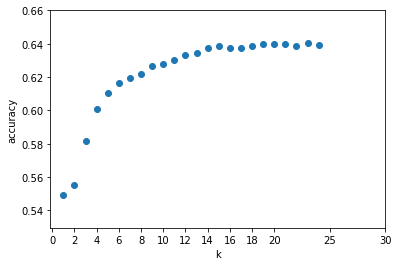

In [90]:
k_range = range(1, 25)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,25,30])
plt.show()

In [130]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=25)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred)*100)

/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


64.0639698965


In [64]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
predictions_NB=clf.predict(X_test)
accuracy_NB=accuracy_score(y_test,predictions_NB)
print(accuracy_NB*100)


57.598563243


/Users/pallavi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


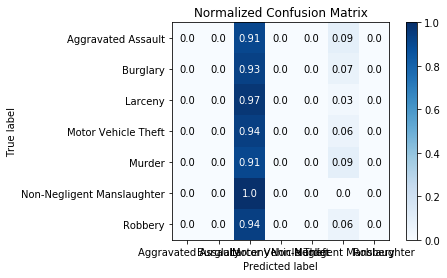

In [79]:
import scikitplot as skplt
fig = plt.figure(figsize=(10,20))
skplt.metrics.plot_confusion_matrix(y_test, predictions_NB, normalize=True)
plt.show()


In [81]:
from sklearn.metrics import classification_report
print('classification_report for KNN Classifier')
print(classification_report(y_test,pred))

classification_report for KNN Classifier
                            precision    recall  f1-score   support

        Aggravated Assault       0.17      0.24      0.20      2014
                  Burglary       0.50      0.51      0.51      4630
                   Larceny       0.72      0.76      0.74     13859
       Motor Vehicle Theft       0.16      0.05      0.07      1253
                    Murder       0.00      0.00      0.00        65
Non-Negligent Manslaughter       0.00      0.00      0.00         4
                   Robbery       0.24      0.09      0.13      1561

               avg / total       0.56      0.58      0.57     23386



In [82]:
from sklearn.metrics import classification_report
print('classification_report for Naive Bayes Classifier')
print(classification_report(y_test,predictions_NB))

classification_report for Naive Bayes Classifier
                            precision    recall  f1-score   support

        Aggravated Assault       0.00      0.00      0.00      2014
                  Burglary       1.00      0.00      0.00      4630
                   Larceny       0.60      0.97      0.74     13859
       Motor Vehicle Theft       0.00      0.00      0.00      1253
                    Murder       0.00      0.00      0.00        65
Non-Negligent Manslaughter       0.00      0.00      0.00         4
                   Robbery       0.00      0.00      0.00      1561

               avg / total       0.56      0.58      0.44     23386



/Users/pallavi/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
clf.fit(X_train,y_train)

print(clf)


NameError: name 'X_train' is not defined

In [51]:
predictions=clf.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print(accuracy*100)


64.3119815274


In [44]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(15,15,15),max_iter=500)
clf.fit(X_train,y_train)

print(clf)

/Users/pallavi/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [45]:
from sklearn.metrics import accuracy_score
predictions=clf.predict(X_test)
accuracy_NB=accuracy_score(y_test,predictions)
print(accuracy_NB*100)



59.2533994698


In [123]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(5,5,5),max_iter=500)
clf.fit(X_train,y_train)

print(clf)

/Users/pallavi/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [124]:
predictions=clf.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print(accuracy*100)

61.6864790901


In [12]:
print('Wrapping Method for feature selection : by adding all the features')
features=pd.DataFrame()
        
features['Shift']=obj_feature_set['Shift']
features['Day']=obj_feature_set['Week_Name']
features['Location_Type']=obj_feature_set['Location_Type']
features['Year']=feature_set_cleaned['OccurredFrom_Date_Year']
features['Month']=feature_set_cleaned['OccurredThrough_Date_Month']
features['Latitude']=feature_set_cleaned['X']
features['Longitute']=feature_set_cleaned['Y']
display(features.head(5))

Wrapping Method for feature selection : by adding all the features


,Shift,Day,Location_Type,Year,Month,Latitude,Longitute
13,2,2,1,2016,5,-77.641021,43.145561
14,1,1,18,2016,4,-77.644837,43.166885
15,2,5,1,2016,6,-77.628075,43.138832
16,1,6,2,2017,6,-77.629077,43.137793
17,1,5,2,2016,7,-77.629077,43.137793


In [13]:
target=pd.DataFrame()
target['TypeOFCrime']=obj_feature_set['Statute_Text'].astype(str)

print(target.TypeOFCrime.unique())

print(target.columns)


['Larceny' 'Robbery' 'Burglary' 'Aggravated Assault' 'Motor Vehicle Theft'
 'Murder' 'Non-Negligent Manslaughter']
Index(['TypeOFCrime'], dtype='object')


In [14]:
target['Larceny']=np.where(target["TypeOFCrime"]=='Larceny',1,0)

print('Target size for Larceny  :', target["Larceny"].value_counts())

print('===================================================================')
print(target.head(5))

Target size for Larceny  : 1    46252
0    31700
Name: Larceny, dtype: int64
           TypeOFCrime  Larceny
13             Larceny        1
14             Robbery        0
15            Burglary        0
16  Aggravated Assault        0
17             Robbery        0


In [15]:
labels=target['Larceny']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.30, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(
    n_estimators=10,
    max_features=7,
    random_state=5
)

rf.fit(X_train, y_train)
pred = rf.predict_proba(X_test)
# print(accuracy_score(y_test, p)*100)



print(type(pred))


<class 'numpy.ndarray'>


In [37]:
p=pred[:,0]
print(np.shape(p))

p=np.where(p>0.5,1,0)
print(p)

final_csv=pd.DataFrame(columns=['Latitiude','Longitutde','Predictions'])
final_csv['Latitiude'] =X_test['Latitude']
final_csv['Longitutde'] =X_test['Longitute']
final_csv['Predictions']=p

file_name='final_csv.csv'
final_csv.to_csv(file_name, sep=',')

(23386,)
[1 0 1 ..., 1 0 1]


In [18]:
from sklearn.metrics import classification_report
print('classification_report for KNN Classifier')
print(classification_report(y_test,p))

classification_report for KNN Classifier
             precision    recall  f1-score   support

          0       0.26      0.41      0.32      9527
          1       0.34      0.21      0.26     13859

avg / total       0.31      0.29      0.28     23386



In [19]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,p)
print(accuracy*100)



29.0002565638


In [23]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline


def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=5)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=5)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=5)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=5)

    models = {'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P




In [24]:
models = get_models()
P = train_predict(models)


Fitting models.
knn... done
naive bayes... done
mlp-nn... done
random forest... done
gbm... done
logistic... done
Done.



In [30]:
from sklearn.metrics import roc_auc_score

def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score*100))
    print("Done.\n")

In [31]:

score_models(P, y_test)

Scoring models.
knn                       : 70.970
naive bayes               : 63.743
mlp-nn                    : 65.984
random forest             : 77.881
gbm                       : 79.752
logistic                  : 66.667
Done.

